<a href="https://colab.research.google.com/github/liminovna/HSE_ML_NOTEBOOKS/blob/main/ML_HW4_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Часть 2

Будем использовать датасет по мобильным телефонам и предсказывать ценовой сегмент телефона.

Описание признаков:
* index - id записи
* UTC - время создания записи
* Temperature[C] - Air Temperature
* Humidity[%] - Air Humidity
* TVOC[ppb] - Total Volatile Organic Compounds; measured in parts per billion
* eCO2[ppm] - co2 equivalent concentration; calculated from different values like TVCO
* Raw H2 - raw molecular hydrogen; not compensated (Bias, temperature, etc.)
* Raw Ethanol -  raw ethanol gas
* Pressure[hPa] - Air Pressure
* PM1.0 - particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
* PM2.5 - particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
* NC0.5 - Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
* NC1.0 - Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
* NC2.5 - Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
* CNT - номер записи
* Fire - Alarmground truth is "1" if a fire is there



## 2.11. Загрузка данных

In [2]:
# Загружаем данные из ссылки

sharing_url = "https://drive.google.com/file/d/1TJI9IVaZQtaTJUezLrC3WaQ-eEC40AGG/view?usp=sharing"
download_url = "https://drive.google.com/uc?id=" + sharing_url.split("/")[-2]

df = pd.read_csv(download_url, index_col='Unnamed: 0')
df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


## 2.12. EDA и feature engineering

In [3]:
# описываем распределения данных
df.describe(include='all')

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


Из описания признаков видим, что все они количественные, кроме таргета

In [4]:
df['Fire Alarm'].value_counts()

,count
Fire Alarm,
1,44757
0,17873


Датасет не сбалансирован: один из классов составляет более 70% данных

In [5]:
# преобразим UNIX время в часы в 24-часовом формате с количеством минут в качестве доли

df['UTC'] = pd.to_datetime(df['UTC'], unit='s').dt.hour + pd.to_datetime(df['UTC'], unit='s').dt.minute / 60
df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0.133333,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,0.133333,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,0.133333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,0.133333,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,0.133333,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,14.333333,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,14.333333,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,14.333333,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,14.333333,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [6]:
# удаляем столбец с номером записи, т.к. кажется, что в анализе он мало полезен
df.drop(columns=['CNT'], inplace=True)

In [7]:
# смотрим, какие средние значения признаков для каждого из таргетов
df.groupby(['Fire Alarm']).mean()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
Fire Alarm,,,,,,,,,,,,,
0,12.108159,19.694803,42.930077,4596.587255,962.587255,12896.316847,20082.823533,938.101383,261.982706,450.034639,1356.283816,493.872027,178.982259
1,8.331223,14.483152,50.779534,882.013071,553.189356,12960.878053,19623.050428,938.837806,36.146406,78.417842,146.111337,87.665549,40.541627


лучше изобразить эти распределения на графике

In [8]:
# Импортируем библиотеки для визуализации и настраиваем тему
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid") # white, dark, whitegrid, darkgrid, ticks
sns.set_color_codes("muted")

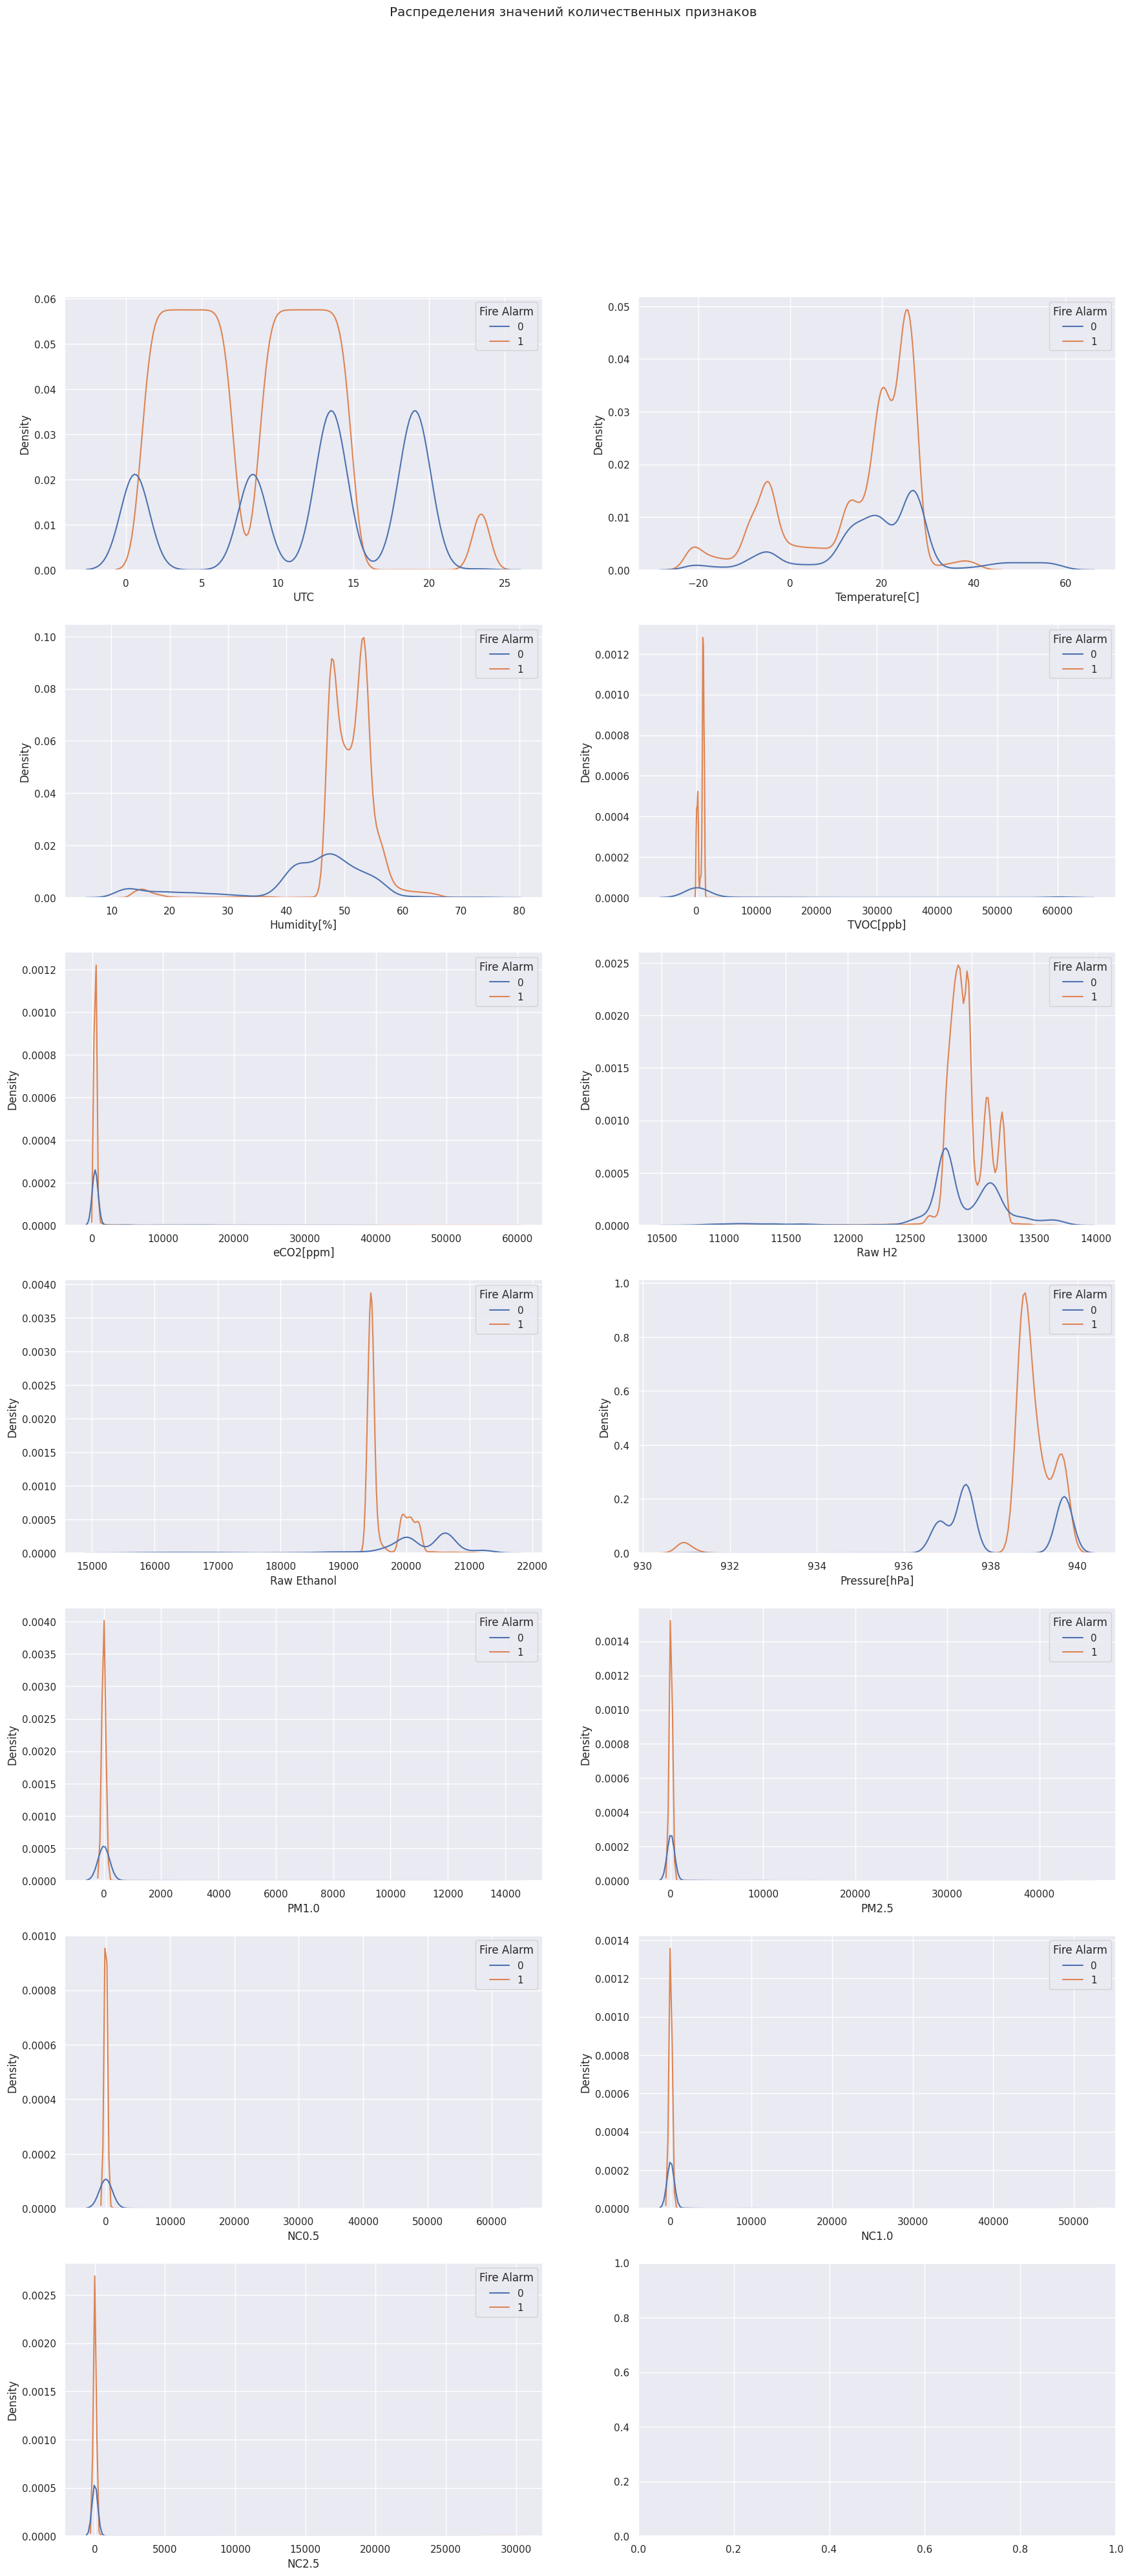

In [9]:
# рисуем распределения плотности
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(21,45))
fig.suptitle('Распределения значений количественных признаков')
ax = axes.flatten()

for i, q in enumerate(df.drop(columns=['Fire Alarm']).columns):
    sns.kdeplot(df, x=q, hue="Fire Alarm", ax=ax[i])

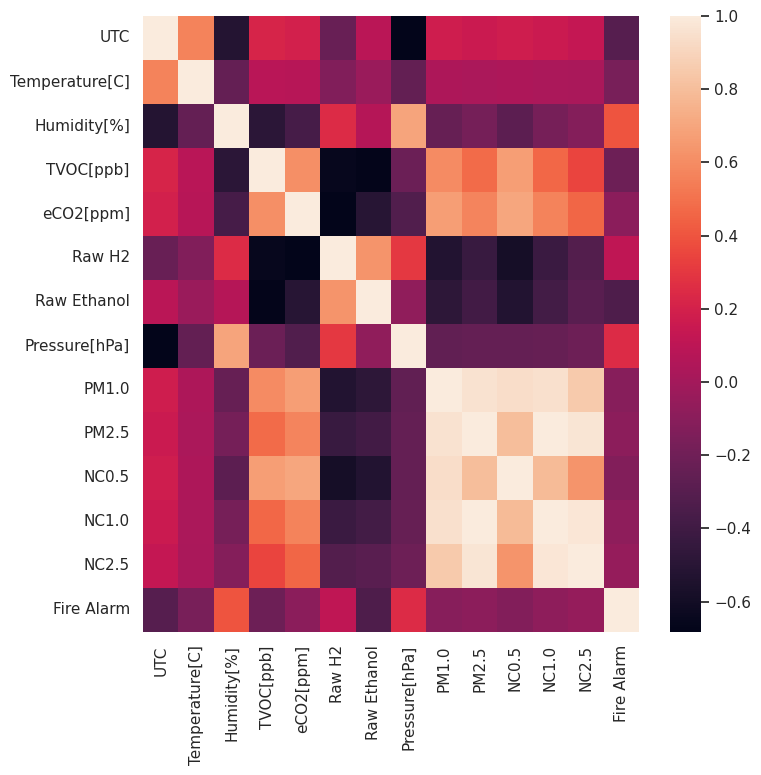

In [10]:
# строим тепловую карту
f, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(data=df.corr(), annot_kws={'rotation': 90})

## 2.13. Выбрать метрики для оценки качества моделей и аргументировать их

Так как классы не сбалансированы, мы можем использовать f1 и AUC

## 2.14. Построить базовую модель - Логистическую регрессию и оценить ее, проанализировать важность признаков

In [11]:
# делим датасет на трейн и тест и нормализуем данные в обучающей выборке
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop(columns=['Fire Alarm'])
y = df['Fire Alarm']

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [12]:
clf = LogisticRegression(random_state=42)

In [13]:
# обучаем и делаем предсказания
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      3594
           1       0.92      0.97      0.95      8932

    accuracy                           0.92     12526
   macro avg       0.92      0.89      0.90     12526
weighted avg       0.92      0.92      0.92     12526



In [15]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))


0.9695181936057534


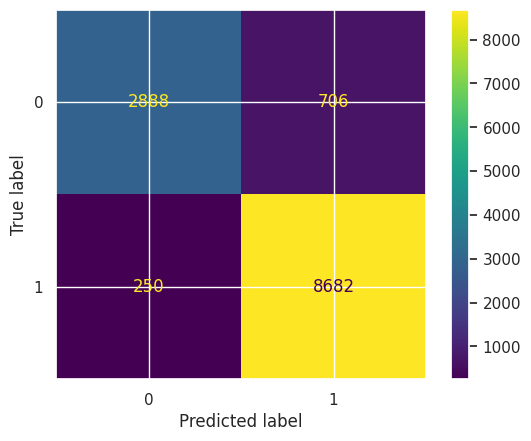

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot()

Модель справляется с классификацией с `accuracy`=0.92 и `roc_auc_score`=0.97

In [17]:
# Заводим датафрейм с весами признаков для Fire Alarm=0
weights_baseline0 = pd.DataFrame({'feature': X.columns,
                        'weight': clf.coef_.flatten()})
weights_baseline0.sort_values('weight', ascending=False)

,feature,weight
4,eCO2[ppm],6.536846
5,Raw H2,3.291775
2,Humidity[%],1.356106
0,UTC,1.087325
10,NC0.5,-0.013204
8,PM1.0,-0.130886
9,PM2.5,-0.218042
11,NC1.0,-0.223410
12,NC2.5,-0.275528
1,Temperature[C],-1.601049


[Text(0, 0, '1.08732'),
 Text(0, 0, '-1.60105'),
 Text(0, 0, '1.35611'),
 Text(0, 0, '-21.1201'),
 Text(0, 0, '6.53685'),
 Text(0, 0, '3.29178'),
 Text(0, 0, '-8.1183'),
 Text(0, 0, '-1.97881'),
 Text(0, 0, '-0.130886'),
 Text(0, 0, '-0.218042'),
 Text(0, 0, '-0.0132039'),
 Text(0, 0, '-0.22341'),
 Text(0, 0, '-0.275528')]

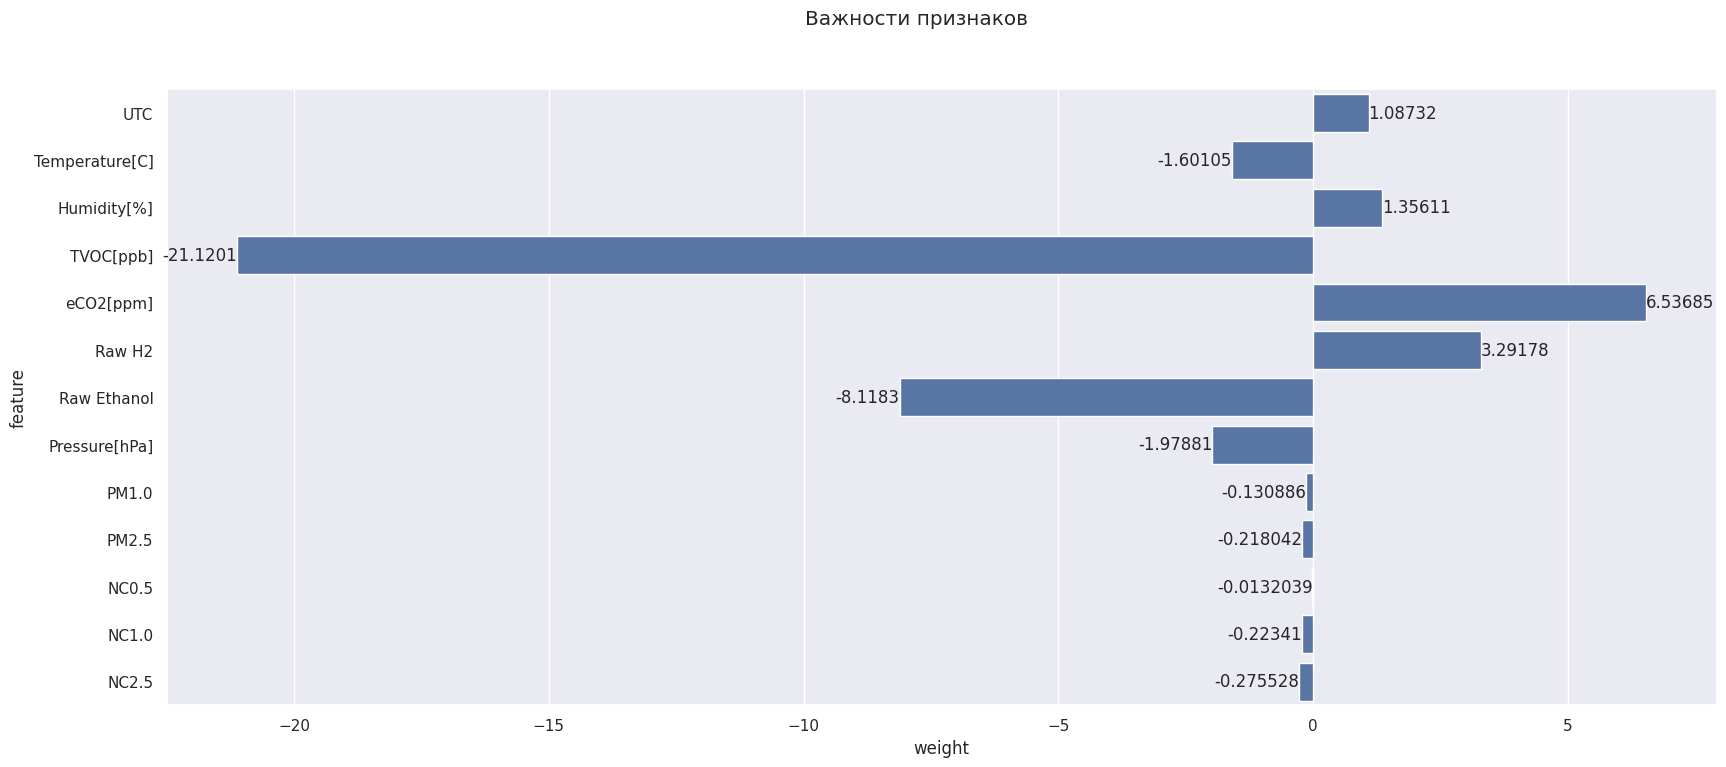

In [18]:
# рисуем важность признаков
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(20,8), sharex=True)
fig.suptitle('Важности признаков')
# ax = axes.flatten()


weights_baseline = pd.DataFrame({'feature': X.columns, 'weight': clf.coef_.flatten()})
p = sns.barplot(weights_baseline, x='weight', y='feature')
p.bar_label(p.containers[0])

Среди признаков по важности значительно выделяется TVOC. Также нужно отметить влияние признаков eCO2, RawH2, RawEthanol.

## 2.15. Осуществить подбор гипер-параметров для модели логистической регрессии. Оценить изменение метрик и важности признаков

In [19]:
# определяем пул значений для RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

distributions = {
    'C': uniform(loc=0, scale=4),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

clf_rs = RandomizedSearchCV(clf, distributions, random_state=42)

In [20]:
# обучаем и находим лучшие гиперпараметры
clf_rs.fit(X_train, y_train)

clf_rs.best_params_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

{'C': np.float64(2.404460046972835), 'solver': 'newton-cg'}

In [21]:
clf_rs.best_score_

np.float64(0.9238783763677116)

In [22]:
y_pred_rs = clf_rs.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rs))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      3594
           1       0.93      0.97      0.95      8932

    accuracy                           0.92     12526
   macro avg       0.92      0.89      0.90     12526
weighted avg       0.92      0.92      0.92     12526



In [24]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
print(roc_auc_score(y_test, clf_rs.predict_proba(X_test)[:, 1]))

0.9714257927515657


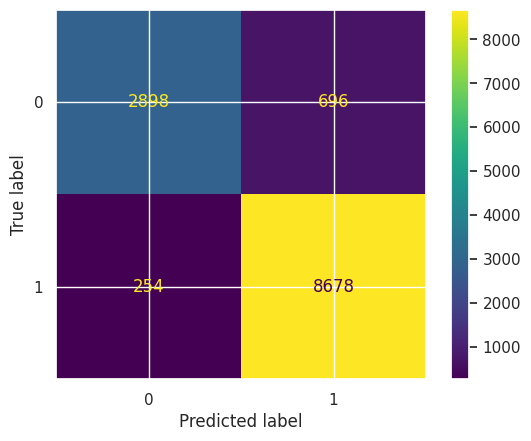

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred_rs)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf_rs.classes_)
disp.plot()

In [26]:
# Заводим датафрейм с весами признаков для Fire Alarm=0
weights_baseline_rs0 = pd.DataFrame({'feature': X.columns,
                        'weight': clf_rs.best_estimator_.coef_.flatten()})
weights_baseline_rs0.sort_values('weight', ascending=False)

,feature,weight
4,eCO2[ppm],8.443602
5,Raw H2,3.760078
2,Humidity[%],1.406555
0,UTC,1.163195
12,NC2.5,-0.064789
11,NC1.0,-0.205172
9,PM2.5,-0.217630
8,PM1.0,-0.384792
10,NC0.5,-0.540500
1,Temperature[C],-1.676210


[Text(0, 0, '1.16319'),
 Text(0, 0, '-1.67621'),
 Text(0, 0, '1.40655'),
 Text(0, 0, '-26.1701'),
 Text(0, 0, '8.4436'),
 Text(0, 0, '3.76008'),
 Text(0, 0, '-9.13942'),
 Text(0, 0, '-2.14165'),
 Text(0, 0, '-0.384792'),
 Text(0, 0, '-0.21763'),
 Text(0, 0, '-0.5405'),
 Text(0, 0, '-0.205172'),
 Text(0, 0, '-0.0647892')]

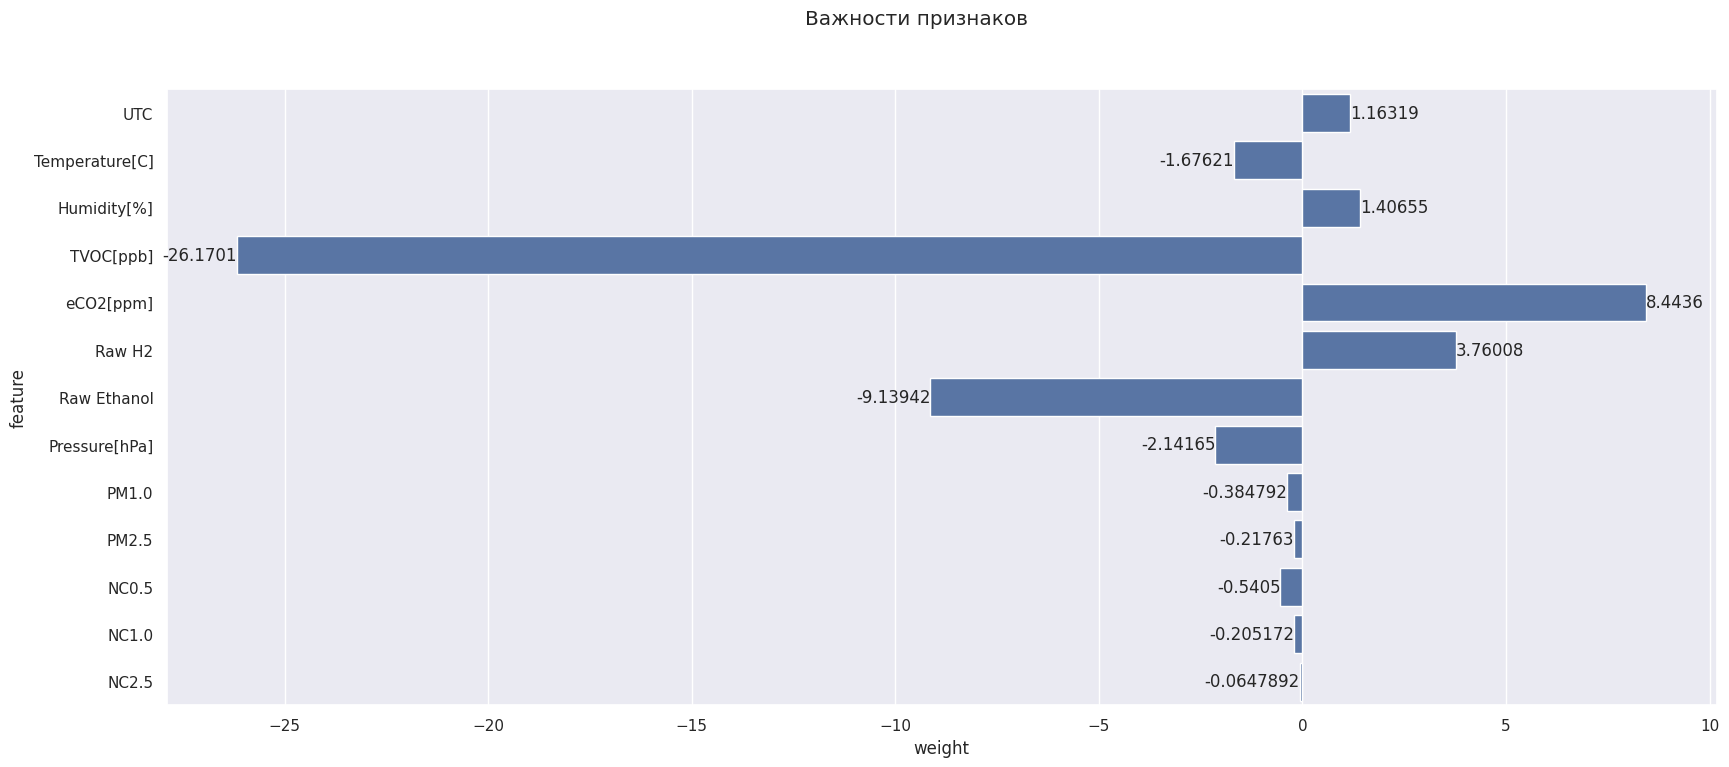

In [27]:
# рисуем важность признаков
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(20,8), sharex=True)
fig.suptitle('Важности признаков')
# ax = axes.flatten()


weights_baseline = pd.DataFrame({'feature': X.columns, 'weight': clf_rs.best_estimator_.coef_.flatten()})
p = sns.barplot(weights_baseline, x='weight', y='feature')
p.bar_label(p.containers[0])

In [28]:
# помещаем веса признаков бэйзлайна для всех Fire Alarm в один датафрейм
weights_baseline_comp = pd.DataFrame({'feature': X.columns, 'weight': clf.coef_.flatten()})

# помещаем веса признаков модели с лучшими гиперпараметрами для всех Fire Alarm в один датафрейм
weights_rs_comp = pd.DataFrame({'feature': X.columns, 'weight': clf_rs.best_estimator_.coef_.flatten()})

# джойним оба датафрейма, чтобы сравнить веса до и после настройки гиперпараметров
weights_comp = pd.merge(left=weights_baseline_comp, right=weights_rs_comp, on=['feature'], how='outer', suffixes=('_baseline', '_rs'))

# добавляем колонку с разницей
weights_comp['diff'] = weights_comp['weight_baseline'] - weights_comp['weight_rs']

In [29]:
weights_comp.style.background_gradient(subset='diff', cmap='YlOrRd')

,feature,weight_baseline,weight_rs,diff
0,Humidity[%],1.356106,1.406555,-0.050448
1,NC0.5,-0.013204,-0.540500,0.527296
2,NC1.0,-0.223410,-0.205172,-0.018238
3,NC2.5,-0.275528,-0.064789,-0.210738
4,PM1.0,-0.130886,-0.384792,0.253905
5,PM2.5,-0.218042,-0.217630,-0.000412
6,Pressure[hPa],-1.978807,-2.141647,0.162839
7,Raw Ethanol,-8.118297,-9.139419,1.021122
8,Raw H2,3.291775,3.760078,-0.468303
9,TVOC[ppb],-21.120054,-26.170091,5.050037


После настройки гиперпараметров веса почти не поменялись, и основные изменения произошли для признаков TVOC[ppb], eCO2[ppm] и Raw Ethanol. При этом AUC возросло с 0.9695 до 0.9714. F1 мера не изменилась

## 2.16. Постройте модель из библиотеки lightgbm - LGBMClassifier, и также оцените ее

In [30]:
from lightgbm import LGBMClassifier

In [31]:
clf_lgbm = LGBMClassifier(random_state=42)

In [32]:
# переименовываем столбцы, чтобы LGBMClassifier не ругался на "special JSON characters"
X_train = X_train.rename(columns={
    'Temperature[C]': 'Temperature',
    'Humidity[%]': 'Humidity',
    'TVOC[ppb]': 'TVOC',
    'eCO2[ppm]': 'eCO2',
    'Pressure[hPa]': 'Pressure',
    'PM1.0': 'PM1_5',
    'PM2.5': 'PM2_5',
    'NC0.5': 'PM0_5',
    'NC1.0': 'PM1_0',
    'NC2.5': 'NC2_5'
  })

In [33]:
# обучаем и делаем предсказания
clf_lgbm.fit(X_train, y_train)
y_pred_lgbm = clf_lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35825, number of negative: 14279
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 50104, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.715013 -> initscore=0.919856
[LightGBM] [Info] Start training from score 0.919856


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      3594
           1       1.00      0.93      0.96      8932

    accuracy                           0.95     12526
   macro avg       0.92      0.96      0.94     12526
weighted avg       0.96      0.95      0.95     12526



In [35]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
print(roc_auc_score(y_test, clf_lgbm.predict_proba(X_test)[:, 1]))

0.9648495645451779


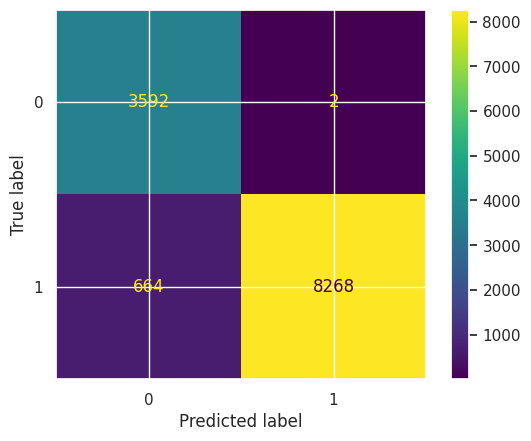

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf_lgbm.classes_)
disp.plot()

LGBMClassifier с меньшими ошибками предсказывает отсутствие возгорания, но при этом AUC чуть хуже, чем у линейной регрессии -- 0.9649

## 2.17. Опишите какие гипер-параметры есть у бустинга над решающими деревьями, и подберите лучшие для классификатора из пункта 6.

- num_leaves - максимальное количество листьев
- max_depth - максимальная глубина дерева
- learning_rate
- n_estimators - количество деревьев, участвующих в обучении
- min_split_gain - минимальный размер уменьшения лосса перед следующим разделеним ноды
- reg_alpha - L1 регуляризация
- reg_lambda - L2 регуляризация

In [37]:
# определяем пул значений для GridSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

grid = {
    # 'estimator__num_leaves': list(range(0,5,5)),
    'estimator__max_depth': [1, 5, 10, 50, -1],
    'estimator__n_estimators': [10, 20, 30, 50, 80, 100]
}

clf_lgbm_gs = GridSearchCV(estimator=clf_lgbm, param_grid=grid)

In [38]:
# обучаем и находим лучшие гиперпараметры
clf_lgbm_gs.fit(X_train, y_train)

clf_lgbm_gs.best_params_

[LightGBM] [Warning] Unknown parameter: estimator__n_estimators
[LightGBM] [Warning] Unknown parameter: estimator__max_depth
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: estimator__n_estimators
[LightGBM] [Warning] Unknown parameter: estimator__max_depth
[LightGBM] [Info] Number of positive: 28660, number of negative: 11423
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 40083, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.715016 -> initscore=0.919874
[LightGBM] [Info] Start training from score 0.919874
[LightGBM] [Warning] Unknown parameter: estimator__n_estimators
[LightGBM] [Warning] Unknown parameter: estimator__max_depth
[LightGBM] [Warning] Unknown parameter: estimator__n_

{'estimator__max_depth': 1, 'estimator__n_estimators': 10}

In [39]:
y_pred_lgbm_gs = clf_lgbm_gs.predict(X_test)

[LightGBM] [Warning] Unknown parameter: estimator__n_estimators
[LightGBM] [Warning] Unknown parameter: estimator__max_depth


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lgbm_gs))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      3594
           1       1.00      0.93      0.96      8932

    accuracy                           0.95     12526
   macro avg       0.92      0.96      0.94     12526
weighted avg       0.96      0.95      0.95     12526



In [41]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
print(roc_auc_score(y_test, clf_lgbm_gs.predict_proba(X_test)[:, 1]))

[LightGBM] [Warning] Unknown parameter: estimator__n_estimators
[LightGBM] [Warning] Unknown parameter: estimator__max_depth
0.9648495645451779


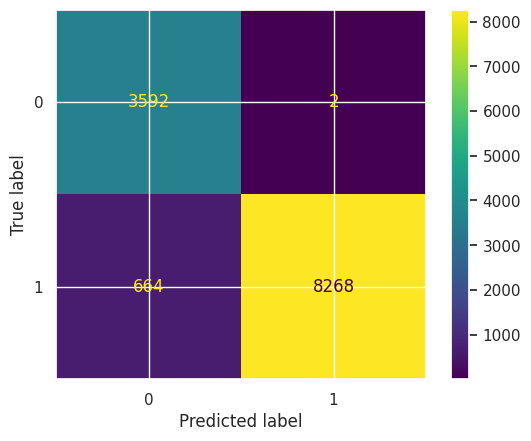

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred_lgbm_gs)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf_lgbm.classes_)
disp.plot()

## 2.18. Проанализируйте важность признаков модели бустинга. Какие признаки похожи по важности с линейной моделью? Какие отличаются? Почему так может быть?

In [43]:
# Импортируем библиотеки для визуализации и настраиваем тему
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid") # white, dark, whitegrid, darkgrid, ticks
sns.set_color_codes("muted")

[Text(0, 0, '430'),
 Text(0, 0, '187'),
 Text(0, 0, '306'),
 Text(0, 0, '267'),
 Text(0, 0, '256'),
 Text(0, 0, '90'),
 Text(0, 0, '354'),
 Text(0, 0, '434'),
 Text(0, 0, '464'),
 Text(0, 0, '96'),
 Text(0, 0, '97'),
 Text(0, 0, '2'),
 Text(0, 0, '17')]

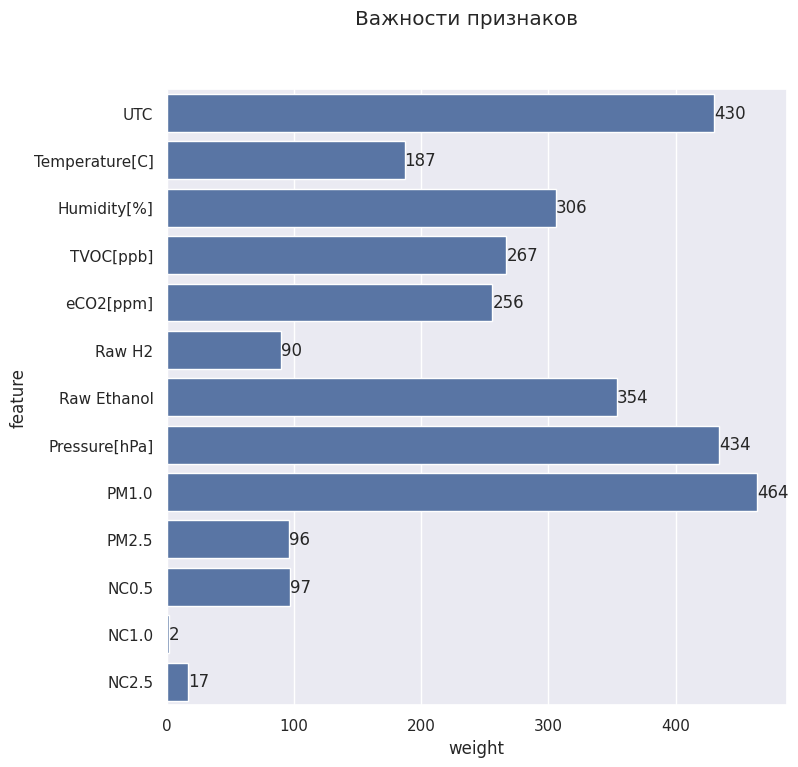

In [46]:
# рисуем важность признаков
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,8), sharex=True)
fig.suptitle('Важности признаков')
# ax = axes.flatten()


weights_lgbm_rs = pd.DataFrame({'feature': X.columns, 'weight': clf_lgbm_gs.best_estimator_.feature_importances_.flatten()})
p = sns.barplot(weights_lgbm_rs, x='weight', y='feature')
p.bar_label(p.containers[0])

Важности признаков для логистической регрессии и для бустинга совсем не похожи. Если в логистической регрессии с большим отрывом выделялись TVOC, eCO2, RawH2 и RawEthanol, то в бустинге среди самых важных мы можем выделить PM1.0, Pressure, UTC, Raw Ethanol.

## 2.19. Приведите примеры хороших предсказаний при помощи бустинга, приведите примеры плохих.

In [47]:
lgbm_comp = pd.concat([y_test, pd.Series(y_pred_lgbm_gs, index=y_test.index)], axis=1)
lgbm_comp.columns = ['true', 'pred']

In [48]:
# "хорошие" предсказания
df.loc[lgbm_comp[lgbm_comp['true']==lgbm_comp['pred']].head(10).index]

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
49054,14.600000,24.300,53.78,1297,400,13015,19403,938.774,2.03,2.11,13.99,2.181,0.049,1
55910,19.583333,43.330,18.53,0,400,13621,21322,936.812,1.16,1.21,7.98,1.245,0.028,0
33802,10.366667,18.440,56.79,358,400,13069,19907,939.295,0.33,0.34,2.24,0.349,0.008,1
9683,2.833333,-4.350,57.35,825,977,12634,19523,939.138,2.58,2.68,17.78,2.773,0.063,1
25558,8.083333,11.740,56.65,10,400,12823,19800,939.835,0.11,0.12,0.77,0.130,0.009,0
5692,1.716667,-9.167,55.23,49,400,13243,20195,939.702,2.16,2.25,14.88,2.320,0.052,1
7339,2.183333,-4.462,50.79,277,400,13114,19990,939.511,0.39,0.41,2.69,0.420,0.009,1
62290,14.250000,-20.551,12.35,10313,400,13238,19366,936.692,1.03,1.07,7.11,1.109,0.025,0
49022,14.600000,27.010,47.69,1320,400,12998,19404,938.774,1.56,1.62,10.76,1.678,0.038,1
20083,5.716667,15.824,52.98,1195,400,12936,19430,938.716,1.27,1.32,8.77,1.368,0.031,1


In [49]:
# "плохие" предсказания
pd.concat([df.loc[lgbm_comp[lgbm_comp['true']!=lgbm_comp['pred']].head(10).index], lgbm_comp[lgbm_comp['true']!=lgbm_comp['pred']]['pred'].head(10)], axis=1)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,pred
31120,9.616667,21.33,51.93,138,400,13190,20128,939.690,0.96,1.00,6.60,1.030,0.023,1,0
30559,9.466667,19.77,54.43,30,400,13246,20209,939.739,2.60,2.70,17.87,2.787,0.063,1,0
29196,9.083333,19.83,53.79,104,400,13234,20122,939.643,2.17,2.25,14.94,2.329,0.053,1,0
29349,9.133333,20.64,49.40,121,400,13217,20098,939.649,2.24,2.33,15.43,2.406,0.054,1,0
31158,9.633333,19.46,54.47,166,400,13175,20102,939.662,1.17,1.21,8.03,1.253,0.028,1,0
30895,9.566667,21.98,49.60,61,400,13230,20205,939.635,1.96,2.04,13.49,2.104,0.048,1,0
50551,23.433333,39.09,15.01,0,3130,12567,20191,930.916,0.87,0.90,5.97,0.932,0.021,1,0
29096,9.066667,22.40,47.61,126,400,13227,20092,939.605,2.05,2.13,14.12,2.201,0.050,1,0
29747,9.233333,22.14,49.21,53,400,13251,20165,939.674,2.37,2.46,16.32,2.545,0.057,1,0
30150,9.350000,19.74,54.70,45,400,13236,20172,939.684,2.18,2.26,14.97,2.335,0.053,1,0


## 2.20. Как изменились метрики? Проанализируйте итоговые значения для всех моделей.

В ходе экспериментов AUC изменился незначительно и изначально, в логистической регрессии "из коробки", был довольно высоким -- около 0.97. В то же время f1-мера повысилась благодаря бустингу.